# The Python Syntax

## The environment and recognised commands

**Exercise:** Write your name and execute.

In [118]:
david

NameError: name 'david' is not defined

**Exercise:** Write the name of the Excel file `gapminder.xlsx` and execute.

In [119]:
gapminder.xlsx

NameError: name 'gapminder' is not defined

How can you make Python literally understand what you type? Using the string: anything between quotes is a string.

**Exercise:** Write your name between quotes and execute.

In [120]:
"david"

'david'

**Exercise:** Write `gapminder.xlsx` between quotes and execute.

In [121]:
"gapminder.xlsx"

'gapminder.xlsx'

**Reason:** Why is the code working **with quotes**?

Anything between quotes is a string, which is an object that Python can understand. Like numbers, mathematical operations, etc.

In [122]:
8*6

48

**Reason:** Why is the code not working **without quotes**?

Anything you put without quotes is considered as a registered command in the Python environment.

**Reason:** What's the Python environment?

The place where you register the commands that Python can understand.

## Transforming an object into another using functions

Let's say you are working with a table in Python.

In [123]:
import pandas 
df = pandas.read_excel('gapminder.xlsx', index_col=0)
df

,life_expectancy,population,gdp_per_cap
country,,,
Afghanistan,43.828,31889923,974.580338
Albania,76.423,3600523,5937.029526
...,...,...,...
Zambia,42.384,11746035,1271.211593
Zimbabwe,43.487,12311143,469.709298


Which functions can you use from this object to transform the data into another object?

### Transform the table into a plot

**Exercise:** For example, create a histogram.

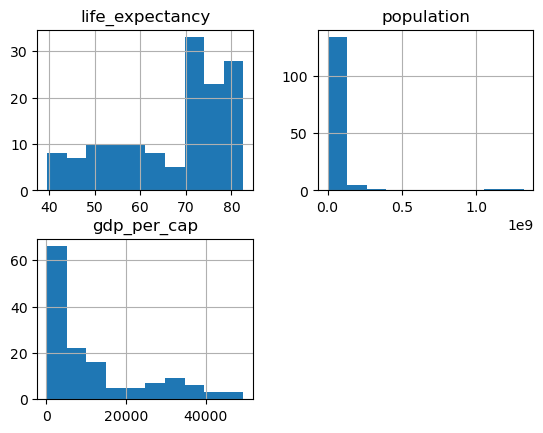

In [88]:
df.hist();

**Exercise:** Now into a boxplot.

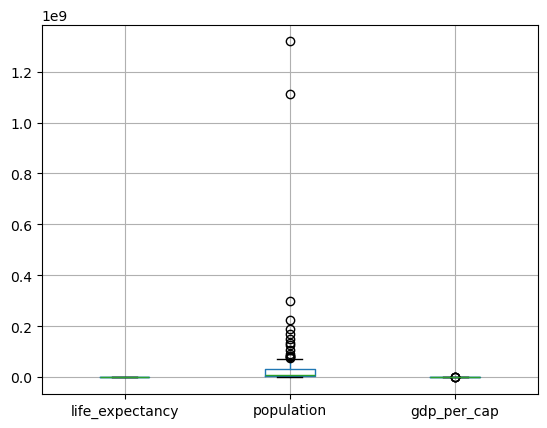

In [89]:
df.boxplot();

You see? The object `df` contains `functions()` to transform the inside data into another object.

This concept applies to any object in Python.

Which other functions do you think `df` has?

**Exercise:** Describe the columns of the table.

In [90]:
df.describe()

,life_expectancy,population,gdp_per_cap
count,142.000000,1.420000e+02,142.00000
mean,67.007423,4.402122e+07,11680.07182
...,...,...,...
75%,76.413250,3.121004e+07,18008.83564
max,82.603000,1.318683e+09,49357.19017


**Exercise:** Calculate the correlation between the columns.

In [91]:
df.corr()

,life_expectancy,population,gdp_per_cap
life_expectancy,1.000000,0.047553,0.678662
population,0.047553,1.000000,-0.055676
gdp_per_cap,0.678662,-0.055676,1.000000


## Dot notation `.` to access functions

### From the `object`

**Exercise:** Which functions does the string object have?

In [98]:
"gapminder.xlsx"

'gapminder.xlsx'

In [99]:
"gapminder.xlsx".title()

'Gapminder.Xlsx'

In [100]:
"gapminder.xlsx".upper()

'GAPMINDER.XLSX'

**Reason:** Does the `"string"` object has a function to load the data from the Excel file?

No, it just has functions to manipulate the text. But not to locate the file in the computer and load the data into Python.

In this case, you need a function from a library.

**Reason:** If pandas is the library that contains functions to load data from files, how can you access these functions?

### From the `library`

First, you import the library.

In [95]:
import pandas

Then, you access the function that loads the data based on the file format.

In [101]:
pandas.read_excel('gapminder.xlsx')

,country,life_expectancy,population,gdp_per_cap
0,Afghanistan,43.828,31889923,974.580338
1,Albania,76.423,3600523,5937.029526
...,...,...,...,...
140,Zambia,42.384,11746035,1271.211593
141,Zimbabwe,43.487,12311143,469.709298


Now if you want to keep working with the table, you need to store it in a variable to reference it later on.

> Instead of loading the data every time you need it.

## Saving transformed object into new variable

By using `table = ...`, you are telling Python to assign a box in the memory called `table` to store the object that the function `read_excel()` returns.

In [124]:
table = pandas.read_excel('gapminder copy.xlsx')

Now, any time you call `table`, you'll access the data that was stored in the memory.

In [125]:
table

,country,continent,year,life_expectancy,population,gdp_per_cap,iso_alpha,iso_num
0,Afghanistan,Asia,2007,43.828,31889923,974.580338,AFG,4
1,Albania,Europe,2007,76.423,3600523,5937.029526,ALB,8
...,...,...,...,...,...,...,...,...
140,Zambia,Africa,2007,42.384,11746035,1271.211593,ZMB,894
141,Zimbabwe,Africa,2007,43.487,12311143,469.709298,ZWE,716


## Chaining consecutive functions

How can you *chain* many functions in the same line?

### Example 1

**Exercise:** Calculate the population by continent and sort the values to create a ranking in a bar plot.

<Axes: ylabel='continent'>

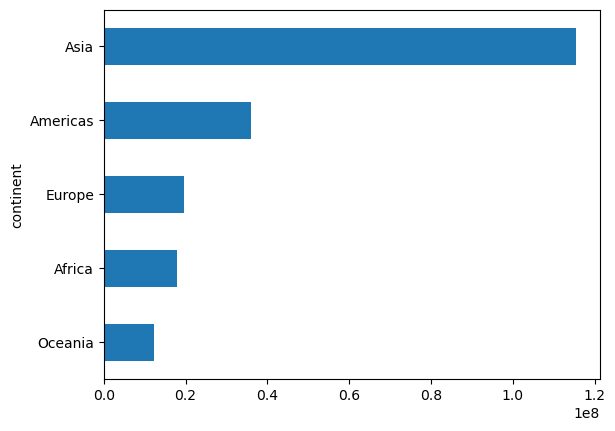

In [ ]:
table.groupby('continent').population.mean().sort_values().plot.barh()

**Reason:** Why does the previous code work?

Because each function returns an object that can execute the next function.

Let's go step by step:

**1. Groupby continent**

In [ ]:
a = df.groupby('continent')
a

**2. Average population**

In [ ]:
b = a.population.mean()
b

continent
Africa      1.787576e+07
Americas    3.595485e+07
                ...     
Europe      1.953662e+07
Oceania     1.227497e+07
Name: population, Length: 5, dtype: float64

**3. Sort values by maximum population**

In [ ]:
c = b.sort_values()
c

continent
Oceania     1.227497e+07
Africa      1.787576e+07
                ...     
Americas    3.595485e+07
Asia        1.155138e+08
Name: population, Length: 5, dtype: float64

**4. Create the bar plot**

<Axes: ylabel='continent'>

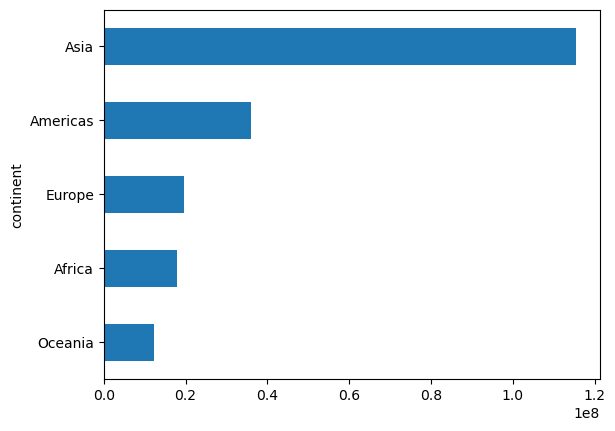

In [126]:
d = c.plot.barh()
d

As you have seen, each resulting object from the function could execute the next function.

What would happen if you try to calculate the sum from the previous plot? Does it make any sense?

In [129]:
d.sum()

AttributeError: 'Axes' object has no attribute 'sum'

Of course not!

`Axes` (the technical word for the plot object) doesn't have a function to sum.

`Axes` is a plot object, not a sequence of numbers object.

Let me rephrase it with an analogy:

1. The **bird** can **fly**: `bird.fly()`
2. The **fish** can **swim**: `fish.swim()`

But...

1. The **bird** cannot **swim**: ~~`bird.swim()`~~
2. The **fish** cannot **fly**: ~~`fish.fly()`~~

The same logic applies to functions. If the function does not accept the object, it will not work.

Let's go with another object: the plots. It will happen the same way.

### Example 2

**Exercise:** Produce a descriptive analysis from the table.

In [112]:
df.describe()

,year,life_expectancy,population,gdp_per_cap,iso_num
count,142.0,142.000000,1.420000e+02,142.00000,142.000000
mean,2007.0,67.007423,4.402122e+07,11680.07182,425.880282
...,...,...,...,...,...
75%,2007.0,76.413250,3.121004e+07,18008.83564,636.000000
max,2007.0,82.603000,1.318683e+09,49357.19017,894.000000


**Exercise:** Chain the function `.mean()` at the end to calculate the average of the columns.

In [113]:
df.describe().mean()

year                1523.000000
life_expectancy       68.600680
                       ...     
gdp_per_cap        12509.350023
iso_num              371.311478
Length: 5, dtype: float64

**Exercise:** Chain the function `.mean()` at the end to calculate the average of the average. Even though it does not make sense, it is possible to chain functions if the previous function returns an object that the next function can use.

In [114]:
df.describe().mean().mean()

38921920.47053717

**Exercise:** Can a simple number create a descriptive analysis?

In [115]:
df.describe().mean().mean().describe()

AttributeError: 'numpy.float64' object has no attribute 'describe'

### Example 3

**Exercise:** Create a boxplot from the table.

<Axes: >

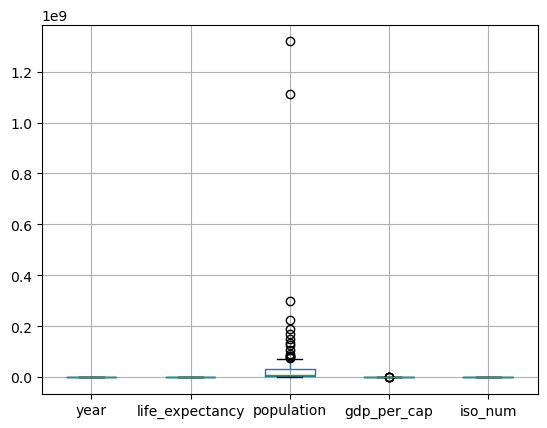

In [116]:
df.boxplot()

**Exercise:** Create a descriptive analysis from the boxplot.

AttributeError: 'Axes' object has no attribute 'describe'

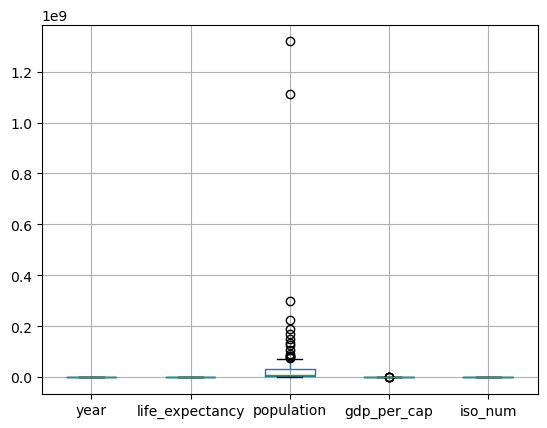

In [117]:
df.boxplot().describe()

## `[]` vs `.`

It's not about when to use `[]` or `.`. It's about what you want to do.

For example, if you have the following object:

In [132]:
table

,country,continent,year,life_expectancy,population,gdp_per_cap,iso_alpha,iso_num
0,Afghanistan,Asia,2007,43.828,31889923,974.580338,AFG,4
1,Albania,Europe,2007,76.423,3600523,5937.029526,ALB,8
...,...,...,...,...,...,...,...,...
140,Zambia,Africa,2007,42.384,11746035,1271.211593,ZMB,894
141,Zimbabwe,Africa,2007,43.487,12311143,469.709298,ZWE,716


You can use it in two ways:

1. `object[key]` to **access** a part of the object.
2. `object.function()` to **transform** the object into another.

### Access object

**Exercise:** Access the `continent` column.

In [133]:
table['continent']

0        Asia
1      Europe
        ...  
140    Africa
141    Africa
Name: continent, Length: 142, dtype: object

### Transform object

**Exercise:** Transform the table into a histogram.

array([[<Axes: title={'center': 'year'}>,
        <Axes: title={'center': 'life_expectancy'}>],
       [<Axes: title={'center': 'population'}>,
        <Axes: title={'center': 'gdp_per_cap'}>],
       [<Axes: title={'center': 'iso_num'}>, <Axes: >]], dtype=object)

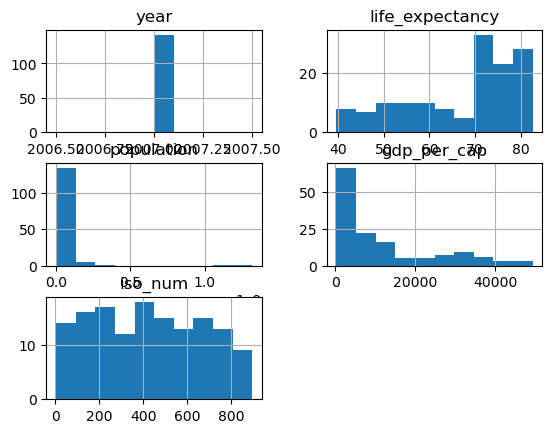

In [139]:
table.hist()

### Combination

What if you wanted to transform a part of the object?

1. Access the object
2. Transform the accessed object

```python
object[key].function()
```

**Exercise:** Transform only the `population` column into a histogram.

<Axes: >

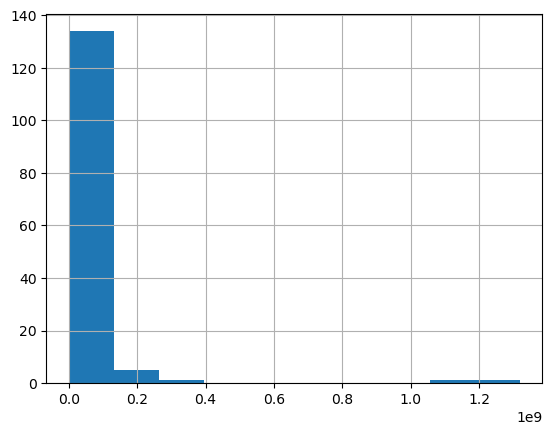

In [143]:
table['population'].hist()

## Conclusions

1. By default, Python recognises specific commands and objects.

    ```python
    "string"
    123
    5*7
    ```

2. For anything new, you must be register it in the environment.
  
    ```python
    variable = ...
    import pandas
    ```

3. Programing is all about tranforming one object into another.

    ```python
    another = object.function()
    ```

4. Use special characters depending on what you want to do with the object.

    - `[]` to access parts of the object.
    - `.` to transform the object into another.

5. You can combine accessing and transforming objects.

    ```python
    object[key].function()
    ```

6. You can chain functions if the previous function returns an object that the next function can use.

    ```python
    object.function().function().function()
    ```